In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# downloaod csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_positive_cases_by_municipality.csv
data = pd.read_csv('data/130001_tokyo_covid19_positive_cases_by_municipality.csv', parse_dates = ['公表_年月日', ], low_memory=False)
# new_positive = data[data['市区町村名'].str.contains('文京区', na=False)]['陽性者数'].diff()
# new_positive.describe()
data

,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
0,131016.0,東京都,千代田区,2020-03-31,市区町村,3
1,131024.0,東京都,中央区,2020-03-31,市区町村,19
2,131032.0,東京都,港区,2020-03-31,市区町村,39
3,131041.0,東京都,新宿区,2020-03-31,市区町村,22
4,131059.0,東京都,文京区,2020-03-31,市区町村,4
...,...,...,...,...,...,...
32443,134015.0,東京都,八丈町,2021-08-19,市区町村,12
32444,134023.0,東京都,青ヶ島村,2021-08-19,市区町村,0
32445,134210.0,東京都,小笠原村,2021-08-19,市区町村,10
32446,NaN,NaN,NaN,2021-08-19,都外,21755


In [94]:
# ref. `第１表` https://www.toukei.metro.tokyo.lg.jp/juukiy/2021/jy21000001.htm

population_dict = {
    '千代田区': 37787,
    '中央区': 95812,
    '港区': 146527,
    '新宿区': 219464,
    '文京区': 123472,
    '台東区': 123068,
    '墨田区': 155354,
    '江東区': 274831,
    '品川区': 228061,
    '目黒区': 158367,
    '大田区': 398687,
    '世田谷区': 490342,
    '渋谷区': 140170,
    '中野区': 207425,
    '杉並区': 325403,
    '豊島区': 178637,
    '北区': 199016,
    '荒川区': 117153,
    '板橋区': 315872,
    '練馬区': 380495,
    '足立区': 357044,
    '葛飾区': 238563,
    '江戸川区': 346934,
    '八王子市': 561828,
    '立川市': 184577,
    '武蔵野市': 147643,
    '三鷹市': 190126,
    '青梅市': 132145,
    '府中市': 260255,
    '昭島市': 113552,
    '調布市': 237815,
    '町田市': 429152,
    '小金井市': 123828,
    '小平市': 195543,
    '日野市': 187027,
    '東村山市': 151575,
    '国分寺市': 126862,
    '国立市': 76371,
    '福生市': 57024,
    '狛江市': 83268,
    '東大和市': 85317,
    '清瀬市': 74905,
    '東久留米市': 117007,
    '武蔵村山市': 72023,
    '多摩市': 148479,
    '稲城市': 92262,
    '羽村市': 54725,
    'あきる野市': 80221,
    '西東京市': 206047,
    '瑞穂町': 32568,
    '日の出町': 16588,
    '檜原村': 2112,
    '奥多摩町': 4991,
    '大島町': 7411,
    '利島村': 310,
    '新島村': 2633,
    '神津島村': 1887,
    '三宅村': 2383,
    '御蔵島村': 307,
    '八丈町': 7224,
    '青ヶ島村': 165,
    '小笠原村': 2606,
}

In [95]:
data = data[(data['公表_年月日'] >= '2021-04-01') & (data['公表_年月日'] < '2021-09-01')]
# data = data[data['市区町村名'].str.contains('区', na=False)]

data = data.dropna()
data

,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
23424,131016.0,東京都,千代田区,2021-04-01,市区町村,642
23425,131024.0,東京都,中央区,2021-04-01,市区町村,1937
23426,131032.0,東京都,港区,2021-04-01,市区町村,4001
23427,131041.0,東京都,新宿区,2021-04-01,市区町村,6951
23428,131059.0,東京都,文京区,2021-04-01,市区町村,1851
...,...,...,...,...,...,...
32441,133817.0,東京都,三宅村,2021-08-19,市区町村,11
32442,133825.0,東京都,御蔵島村,2021-08-19,市区町村,2
32443,134015.0,東京都,八丈町,2021-08-19,市区町村,12
32444,134023.0,東京都,青ヶ島村,2021-08-19,市区町村,0


In [96]:

daily_count = pd.crosstab(data['公表_年月日'], data['市区町村名'], data['陽性者数'], aggfunc=lambda x: x, dropna=False, margins=False)
daily_count = daily_count.reindex(columns=population_dict.keys())
daily_diff = daily_count.diff()

daily_diff_rate = daily_diff.div(population_dict.values(), axis='columns').mul(100)


daily_diff_rate

市区町村名,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,...,奥多摩町,大島町,利島村,新島村,神津島村,三宅村,御蔵島村,八丈町,青ヶ島村,小笠原村
公表_年月日,,,,,,,,,,,,,,,,,,,,,
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-02,0.010586,0.008350,0.006142,0.006835,0.004859,0.009751,0.003862,0.007277,0.007454,0.003789,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2021-04-03,0.007939,0.008350,0.011602,0.013214,0.008099,0.006500,0.004506,0.005094,0.006577,0.006946,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2021-04-04,0.010586,0.006262,0.005460,0.003645,0.008099,0.005688,0.007081,0.004730,0.001754,0.003789,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2021-04-05,0.005293,0.006262,0.005460,0.004101,0.004859,0.000813,0.002575,0.004002,0.003946,0.003789,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15,0.039696,0.058448,0.042995,0.050578,0.028347,0.062567,0.044415,0.066586,0.064456,0.065039,...,0.000000,0.000000,0.0,0.000000,0.0,0.083928,0.0,0.000000,0.0,0.0
2021-08-16,0.044989,0.024005,0.060057,0.045110,0.031586,0.024377,0.021242,0.020740,0.057441,0.061882,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.013843,0.0,0.0
2021-08-17,0.055575,0.057404,0.059375,0.081107,0.045354,0.045503,0.037978,0.044391,0.070157,0.060619,...,0.020036,0.000000,0.0,0.000000,0.0,0.041964,0.0,0.000000,0.0,0.0


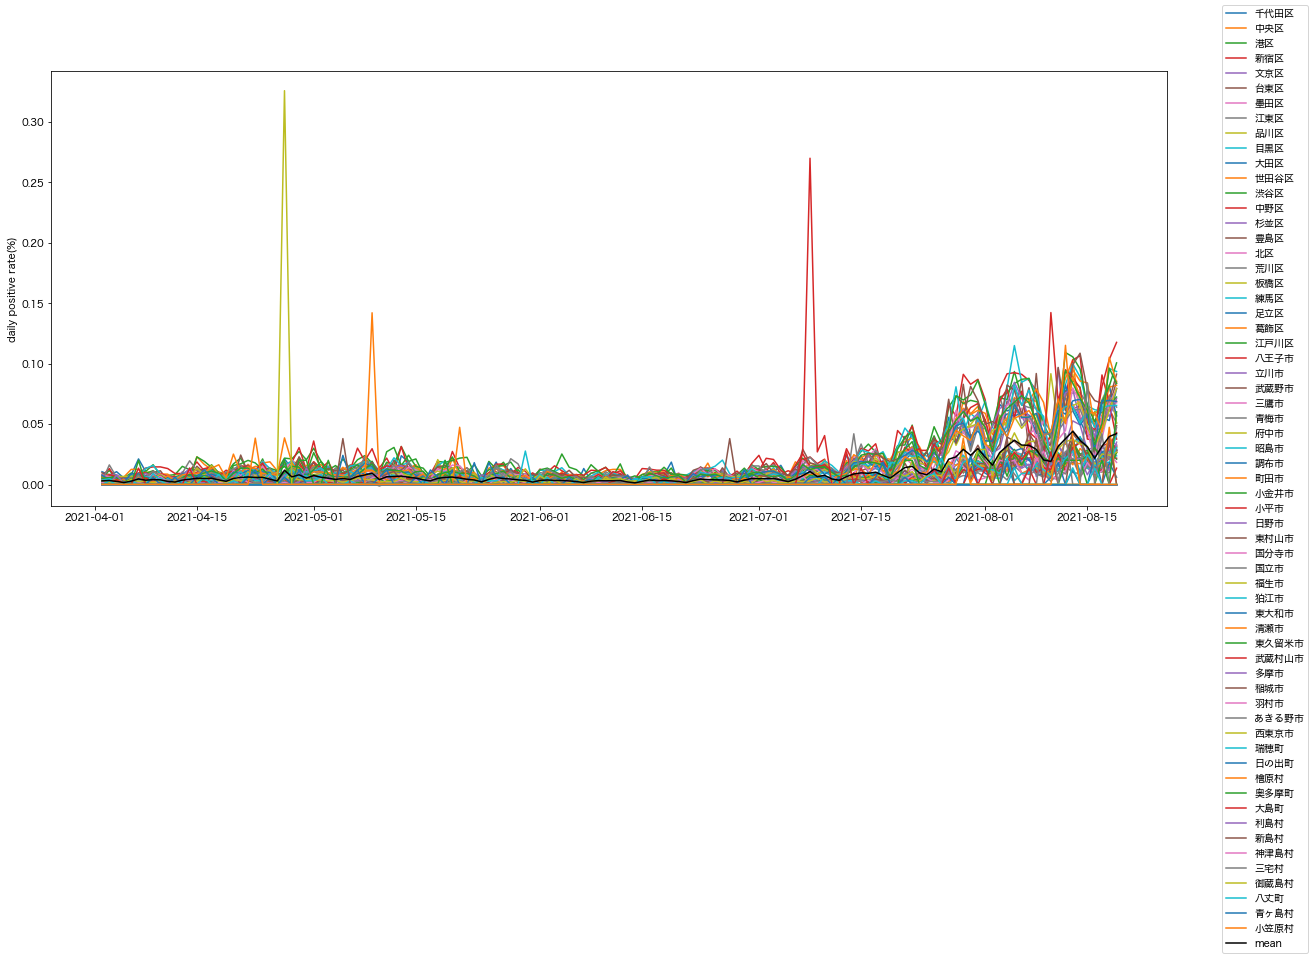

In [97]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

ax1.plot(daily_diff_rate, label=daily_diff_rate.columns)

ax1.plot(daily_diff_rate.mean(axis='columns'), color='k', label='mean')

ax1.set_ylabel('daily positive rate(%)')

fig.legend()


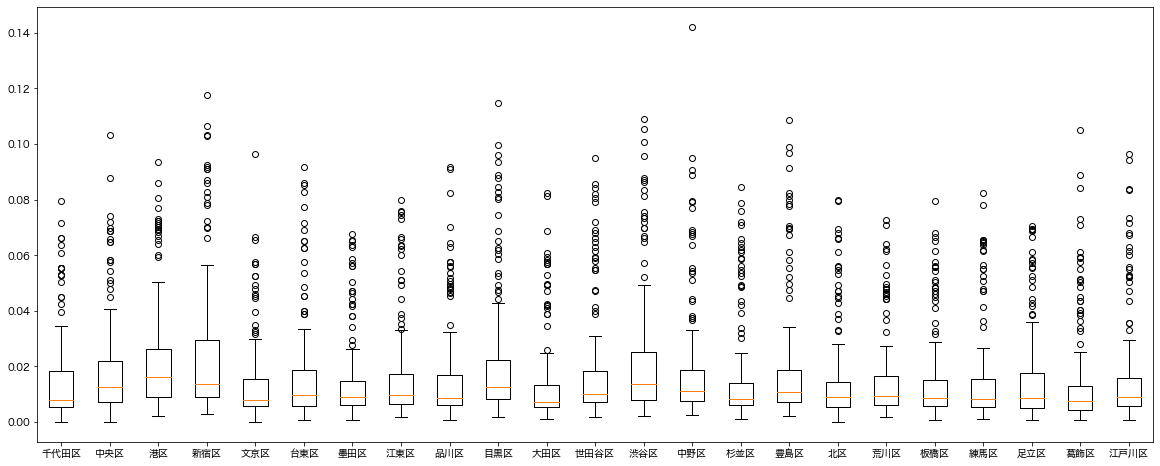

In [99]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = daily_diff_rate.loc[:, daily_diff.columns.str.endswith('区', na=False)].dropna()
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)



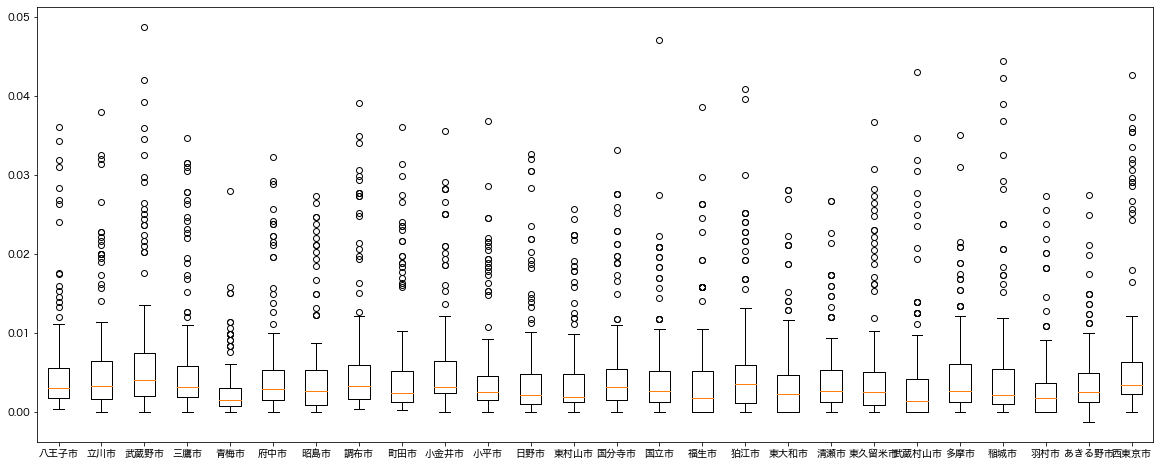

In [100]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = daily_diff_rate.loc[:, daily_diff.columns.str.endswith('市', na=False)].dropna()
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)

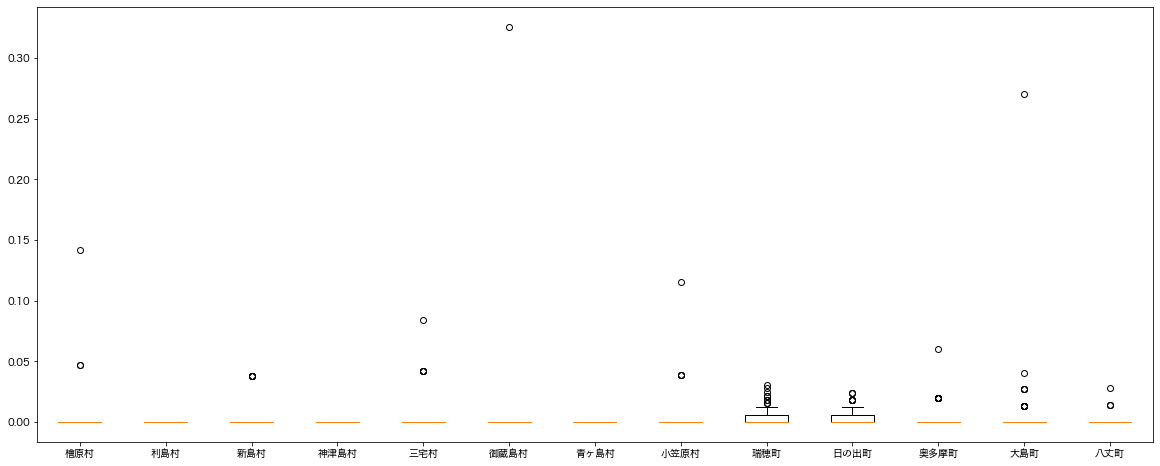

In [101]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = pd.concat([daily_diff_rate.loc[:, daily_diff.columns.str.endswith('村', na=False)].dropna(),
                     daily_diff_rate.loc[:, daily_diff.columns.str.endswith('町', na=False)].dropna()], axis='columns')
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)

In [102]:
# 0.1%以上だった区を含んだ行のみに絞り込む
condition = '> 0.1'
query = '|'.join([f'{key} {condition}' for key in population_dict.keys()])

daily_diff_rate.query(query)

市区町村名,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,...,奥多摩町,大島町,利島村,新島村,神津島村,三宅村,御蔵島村,八丈町,青ヶ島村,小笠原村
公表_年月日,,,,,,,,,,,,,,,,,,,,,
2021-04-27,0.021171,0.015656,0.021839,0.016859,0.009719,0.009751,0.010943,0.010552,0.010524,0.015786,...,0.020036,0.000000,0.0,0.000000,0.0,0.000000,0.325733,0.000000,0.0,0.000000
2021-05-09,0.010586,0.018787,0.017744,0.029618,0.014578,0.013814,0.010943,0.012007,0.007454,0.018312,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-07-08,0.002646,0.017743,0.015697,0.022783,0.009719,0.017876,0.014805,0.022559,0.015785,0.010735,...,0.000000,0.269869,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-08-05,0.063514,0.064710,0.093498,0.092498,0.065602,0.057692,0.058576,0.080049,0.056125,0.114923,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.013843,0.0,0.000000
2021-08-10,0.015878,0.040705,0.032076,0.040553,0.024297,0.008126,0.012230,0.017465,0.091642,0.044201,...,0.000000,0.026987,0.0,0.000000,0.0,0.041964,0.000000,0.000000,0.0,0.000000
2021-08-12,0.071453,0.087672,0.077119,0.072449,0.033206,0.077193,0.063725,0.074591,0.055687,0.082719,...,0.020036,0.000000,0.0,0.000000,0.0,0.041964,0.000000,0.000000,0.0,0.115119
2021-08-13,0.066160,0.103327,0.085991,0.102978,0.052644,0.062567,0.065657,0.075683,0.091204,0.099768,...,0.020036,0.000000,0.0,0.037979,0.0,0.000000,0.000000,0.013843,0.0,0.038373
2021-08-14,0.052928,0.054273,0.080531,0.106623,0.049404,0.065005,0.057289,0.076047,0.063141,0.089034,...,0.020036,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-08-18,0.052928,0.074103,0.065517,0.103434,0.066412,0.065005,0.065013,0.062220,0.082434,0.095980,...,0.000000,0.000000,0.0,0.037979,0.0,0.000000,0.000000,0.000000,0.0,0.000000
